# Learning and Decision Making

## Laboratory 3: Markov decision problems

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. Modeling

Consider once again the knight domain described in the Homework and which you described as a Markov decision process.

<img src="knight.png" width="200px">

Recall that:

* At each step, the knight may move in any of the four directions---up, down, left and right. 

* The movement succeeds with a 0.6 probability and fails with a 0.4 probability. When the movement fails, the knight may stay in the same cell or move to one of the immediately adjacent cells (if there is one) with equal probability.

* The goal of the knight is to save (reach) the princess and avoid the dragon.

**Throughout the lab, use $\gamma=0.99$.**

---

#### Activity 1.        

Implement your Markov decision process in Python. In particular,

* Create a list with all the states;
* Create a list with all the actions;
* For each action, define a `numpy` array with the corresponding transition probabilities;
* Define a `numpy`array with the costs. Make sure that:
    * The costs lie in the interval [0, 1]
    * The cost for standing in the princess's cell is minimal
    * The cost for standing in the dragon's cell is maximal
    * The costs for the intermediate cells are around 1/5 of those of standing in the dragon's cell

The order for the states and actions used in the transition probability and cost matrices should match that in the lists of states and actions. 

**Note**: Don't forget to import `numpy`.

---

In [1]:
import numpy as np
States = {1,2,3,4,5,6}

Actions = ['Up', 'Down', 'Left', 'Right']

PUp = np.array([[0.8, 0.1, 0.0, 0.1, 0.0, 0.0],
   [0.1, 0.7, 0.1, 0.0, 0.1, 0.0],
   [0.0, 0.1, 0.8, 0.0, 0.0, 0.1],
   [0.6, 0.0, 0.0, 0.3, 0.1, 0.0],
   [0.0, 0.6, 0.0, 0.1, 0.2, 0.1],
   [0.0, 0.0, 0.6, 0.0, 0.1, 0.3]])

PDown = np.array([[0.3, 0.1, 0.0, 0.6, 0.0, 0.0],
     [0.1, 0.2, 0.1, 0.0, 0.6, 0.0],
     [0.0, 0.1, 0.3, 0.0, 0.0, 0.6],
     [0.1, 0.0, 0.0, 0.8, 0.1, 0.0],
     [0.0, 0.1, 0.0, 0.1, 0.7, 0.1],
     [0.0, 0.0, 0.1, 0.0, 0.1, 0.8]])

PLeft = np.array([[0.8, 0.1, 0.0, 0.1, 0.0, 0.0],
     [0.6, 0.2, 0.1, 0.0, 0.1, 0.0],
     [0.0, 0.6, 0.3, 0.0, 0.0, 0.1],
     [0.1, 0.0, 0.0, 0.8, 0.1, 0.0],
     [0.0, 0.1, 0.0, 0.6, 0.2, 0.1],
     [0.0, 0.0, 0.1, 0.0, 0.6, 0.3]])

PRight = np.array([[0.3, 0.6, 0.0, 0.1, 0.0, 0.0],
      [0.1, 0.2, 0.6, 0.0, 0.1, 0.0],
      [0.0, 0.1, 0.8, 0.0, 0.0, 0.1],
      [0.1, 0.0, 0.0, 0.3, 0.6, 0.0],
      [0.0, 0.1, 0.0, 0.1, 0.2, 0.6],
      [0.0, 0.0, 0.1, 0.0, 0.1, 0.8]])

C = np.array([[0.2], [0.2], [0.2], [0.2], [1.0], [0.0]])


### 2. Prediction

You are now going to evaluate a given policy, computing the corresponding cost-to-go.

---

#### Activity 2.

Describe the policy that, in each state $x$, always moves the knight to the cell closest to the princess (irrespectively of the dragon). If multiple such cells exist, the knight should select randomly between the two.

For example, suppose that the knight is in cell 1. The knight should then select randomly between the actions _D_ and _R_. Conversely, suppose that the knight is in cell 4. The knight should then select actions _R_ with probability 1.

**Note:** The policy should be described as a vector with as many rows as there are states and as many columns as there are actions, where the entry _xa_ has the probability of selecting action _a_ in state _x_.

---

In [16]:
P = np.array([[0.0, 0.5, 0.0, 0.5],
                 [0.0, 0.5, 0.0, 0.5],
                 [0.0, 1.0, 0.0, 0.0],
                 [0.0, 0.0, 0.0, 1.0],
                 [0.0, 0.0, 0.0, 1.0],
                 [0.0, 0.5, 0.0, 0.5]])


print(P)
                    
        
        


[[0.  0.5 0.  0.5]
 [0.  0.5 0.  0.5]
 [0.  1.  0.  0. ]
 [0.  0.  0.  1. ]
 [0.  0.  0.  1. ]
 [0.  0.5 0.  0.5]]


---

#### Activity 3.

Compute the cost-to-go function $J^\pi$ associated with the policy from Activity 2.

---

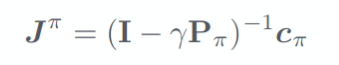

In [18]:
Actions = {0: PUp, 1: PDown, 2:PLeft, 3:PRight}

P_final = np.zeros((6,6))
for pos in range(0,6):
    # print('pos: ',pos)
    for act in range(0,4):
        # print('Action: ', act)
        if P[pos][act] > 0:
            # print('value: ', P[pos][act])
            to_add = P[pos][act]*Actions[act][pos]
            # print('to_add', to_add)
            P_final[pos] += P[pos][act]*Actions[act][pos]
            # print('P_final: ', P_final)

I = np.identity(6)
Y = 0.99
m1 = (I - Y*P_final)
m2 = (np.linalg.inv(m1)).dot(C)
print(m2)

[[16.26056701]
 [15.95826371]
 [15.28584405]
 [16.45495016]
 [16.42766638]
 [15.09441121]]


### 3. Control

In this section you are going to compare value and policy iteration, both in terms of time and number of iterations.

---

#### Activity 4

Show that the policy in Activity 3 is _not_ optimal: use value iteration to compute $J^*$ and show that $J^*\neq J^\pi$. Track the time and the number of iterations taken to compute $J^*$.

**Note 1:** Stop the algorithm when the error between iterations is smaller than $10^{-8}$.

**Note 2:** You may find useful the function ``time()`` from the module ``time``.

---

In [42]:
import time

P = np.squeeze(np.asarray(m2))
J = np.zeros((6,1))
gamma = Y
err = 1
i = 0

initial_time = time.time()

while err > 1e-8:
    QUp = C + Y*PUp.dot(J)
    QDown = C + Y*PDown.dot(J)
    QLeft = C + Y*PLeft.dot(J)
    QRight = C + Y*PRight.dot(J)
    Jnew = np.min((QUp, QDown, QLeft, QRight), axis=0)
    err = np.linalg.norm(Jnew - J)
    i += 1
    J = Jnew
J_final = J
print('J: \n', J_final)
print("Number of interations:",i)

print("Time:", time.time() - initial_time)

J: 
 [[14.06797074]
 [13.93809867]
 [13.67954678]
 [14.24800834]
 [14.74722471]
 [13.53004987]]
Number of interations: 1726
Time: 0.04712629318237305


---

#### Activity 5

Compute once again the optimal policy now using policy iteration. Track the time and number of iterations taken and compare to those of Activity 4.

**Note:** If you find that numerical errors affect your computations (especially when comparing two values/arrays) you may use the `numpy` function `isclose` with adequately set absolute and relative tolerance parameters (e.g., $10^{-8}$).

---

In [15]:
pi = np.ones((6,4))/4

quit = False

initial_time = time.time()
it = 0

while not quit:
    cpi = np.diag(pi[:,0]).dot(C) + np.diag(pi[:,1]).dot(C) + np.diag(pi[:,2]).dot(C) + np.diag(pi[:,3]).dot(C)
    Ppi = np.diag(pi[:,0]).dot(PUp) + np.diag(pi[:,1]).dot(PDown) + np.diag(pi[:,2]).dot(PLeft) + np.diag(pi[:,3]).dot(PRight)
    J = np.linalg.inv(np.eye(6) - Y*Ppi).dot(cpi)
    
    QUp = C + Y*PUp.dot(J)
    QDown = C + Y*PDown.dot(J)
    QLeft = C + Y*PLeft.dot(J)
    QRight = C + Y*PRight.dot(J)
    
    pinew = np.zeros((6,4))
    
    pinew[:, 0, None] = np.isclose(QUp, np.min([QUp, QDown, QLeft, QRight], axis=0), atol=1e-10, rtol=1e-10).astype(int)
    pinew[:, 1, None] = np.isclose(QDown, np.min([QUp, QDown, QLeft, QRight], axis=0), atol=1e-10, rtol=1e-10).astype(int)
    pinew[:, 2, None] = np.isclose(QLeft, np.min([QUp, QDown, QLeft, QRight], axis=0), atol=1e-10, rtol=1e-10).astype(int)
    pinew[:, 3, None] = np.isclose(QRight, np.min([QUp, QDown, QLeft, QRight], axis=0), atol=1e-10, rtol=1e-10).astype(int)
    
    pinew = pinew / np.sum(pinew, axis=1, keepdims = True)
    
    quit = (pi == pinew).all()
    pi = pinew
    it +=1

print(pi)
print("Number of iterations:", it)
print("Time:", time.time() - initial_time)

[[0.  0.  0.  1. ]
 [0.  0.  0.  1. ]
 [0.  1.  0.  0. ]
 [1.  0.  0.  0. ]
 [0.  0.  0.  1. ]
 [0.  0.5 0.  0.5]]
Number of iterations: 3
Time: 0.0030100345611572266


### 4. Simulation

Finally, in this section you will check whether the theoretical computations of the cost-to-go actually correspond to the cost incurred by an agent following a policy.

---

#### Activity 6

Starting both in cell 1 and cell 5 in the figure, 

* Generate **100** trajectories of 10,000 steps each, following the optimal policy for the MDP. 
* For each trajectory, compute the accumulated (discounted) cost. 
* Compute the average cost over the 100 trajectories.
* Compare the resulting value with that computed in Activity 4 for the two states. 

** Note:** The simulation may take a bit of time, don't despair ☺️.

---

In [48]:
trajectory_one = np.zeros(10000,dtype=np.int32)
trajectory_five = np.zeros(10000,dtype=np.int32)

Actions = {0: PUp, 1: PDown, 2:PLeft, 3:PRight}

P=pi

P_final = np.zeros((6,6))
for pos in range(0,6):
    for act in range(0,4):
        if P[pos][act] > 0:
            to_add = P[pos][act]*Actions[act][pos]
            P_final[pos] += P[pos][act]*Actions[act][pos]
            

trajectories = {1 : [], 5 : []}
trajectories_cost = { 1 : [], 5 : []}


for i in range(0,100):
    trajectory_one[0] = 1
    trajectory_five[0] = 5
    
    cost_one = cpi[trajectory_one[0]-1][0]
    cost_five = cpi[trajectory_five[0]-1][0]
    for j in range(1,10000):
        trajectory_one[j] = np.random.choice(6, 1, p = P_final[trajectory_one[j-1]-1].tolist()) + 1 
        cost_one += (Y**j) * cpi[trajectory_one[j]-1][0]
        
        trajectory_five[j] = np.random.choice(6, 1, p = P_final[trajectory_five[j-1]-1].tolist()) + 1
        cost_five += (Y**j) * cpi[trajectory_five[j]-1][0]
        
        
    trajectories[1].append(trajectory_one)
    trajectories[5].append(trajectory_five)
    
    trajectories_cost[1].append(cost_one)
    trajectories_cost[5].append(cost_five)
    

avg_one = np.sum(trajectories_cost[1])/100
avg_five = np.sum(trajectories_cost[5])/100
    

print("Average cost starting in cell 1:",avg_one)
print("Average cost starting in cell 5:",avg_five)
        

Average cost starting in cell 1: 14.273436908708197
Average cost starting in cell 5: 14.417655091924344


As can be expected, the average cost of the trajectories that start in cell 1 is smaller than the average cost of the trajectories that start in cell 5, just like in activity 4. However, since we are now utilizing the optimal policy, the average costs are smaller than in activity 4.